<img src="https://infographcity.com/wp-content/uploads/2016/12/Data-Visualisation.png" style="float: left; margin: 20px; height: 55px">

# Data Visualisation

_Author: Alfred Zou_

---

* Data visualisation is extremely important for exploring and understanding data during data analysis
* It is also important for communicating large amounts of data in a comprehensible manner
* There are mutiple data visualisations packages for Panda, but I will be focusing on Matplotlib.plot and Seaborn
* Matplotlib.pyplot is the original plotting package and forms the basis for a lot of other plotting packages
* It's extremely customisable, but unfortunately its difficult to learn and write
    * pandas.DataFrame has its own plotting method, .plot(), which is a wrapper around the Matplotlib package
    * I recommend plotting DataFrames and Series using .plot(), and using Matplotlib.pyplot for additional customisation or if additional plots are needed
* Seaborn is an extension of Matplotlib, and allows a lot of difficult plots to be plotted easily
* If we want to get fancy with interactable plots, we will need to use another package
* Other data visualisation packages include ggplot, Plotly, Bokeh and pygal
* There are also very impressive visualisation programs that allow for the creation of iteractable dashboards called Tableau and Power BI

### Which Data Visualisation Plot?
---
* Line chart - change over time
* Map - location/geospatial data
* Heatmap - correlation
* Box plots - univariate distribution shape and outliers. Effective for comparing multiple distributions
* Pie chart - relative proportions
* Scatter charts - bivariate trends, correlations and outliers
* Bar / Horizontal Bar charts - univariate distribution shape and outliers. Comparing data across discrete categories
* Stacked Bar / Horizontal Bar charts - comparison of total. i.e. the performance of total different sectors across different companies
* Histograms - univariate distribution shape and outliers
* Tree maps - distribution by size

### Data Types
* The data types indicate which is the preferred chart for visualisation
* Data can be broken down into different categories:
    * Categorical data is data made of words
    * They are best represented by plotting their frequencies onto a bar chart
        * Nominal - named categories
            * Name, eye colour, gender, marital status
        * Ordinal - ranked data, but gives no indication on the difference between ranks
            * First, second and third in a race. Small, medium and large size. 1 star, 2 star, 3 star, 4 star and 5 star rating.
    * Numerical data is made of numbers
        * Discrete - whole units
        * Best represented by bar charts
            * Number of children, age, 
        * Continuous - any numeric value
        * Best represented by histograms, box plots and line chart, if data is over time
            * Temperature, salary
            
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSp-hkIhHNkAxFaRxs5Y0rSZ0LyIznLFqC9ijvZGMLXgtsuomiJ" style='height:300px;margin-left:auto;margin-right:auto'>

### Plotting with pd.DataFrame.plot()
---


In [251]:
'''
Generating plotting data
'%matplotlib inline' is used to display plots in Jupyter Lab/Notebook without using matplotlib.pyplot.show()
'''

import pandas as pd
import numpy as np
%matplotlib inline

np.random.seed(444)
df = pd.DataFrame(np.random.randn(10, 4), 
                  columns=['col1', 'col2', 'col3', 'col4'],
                  index=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'])
df.head()

,col1,col2,col3,col4
a,0.357440,0.377538,1.382338,1.175549
b,-0.939276,-1.143150,-0.542440,-0.548708
c,0.208520,0.212690,1.268021,-0.807303
d,-3.303072,-0.806650,-0.360329,-0.880396
e,0.152631,0.250250,0.078508,-0.903904


In [252]:
housing = pd.read_csv('Data/boston_housing_data.csv')
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


##### Line Plot

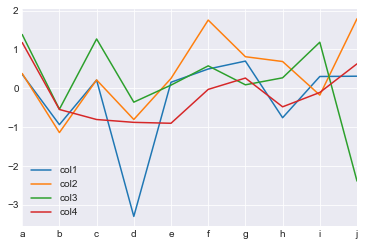

In [253]:
# The default plot is a line graph
df.plot()

##### Increasing Figure Size

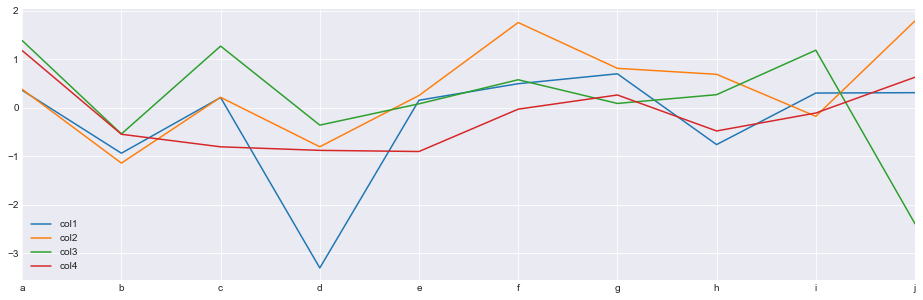

In [254]:
# The default plot is a line graph
df.plot(figsize=(16,5))

##### Plotting 1 Column

a    0.357440
b   -0.939276
c    0.208520
d   -3.303072
e    0.152631
Name: col1, dtype: float64


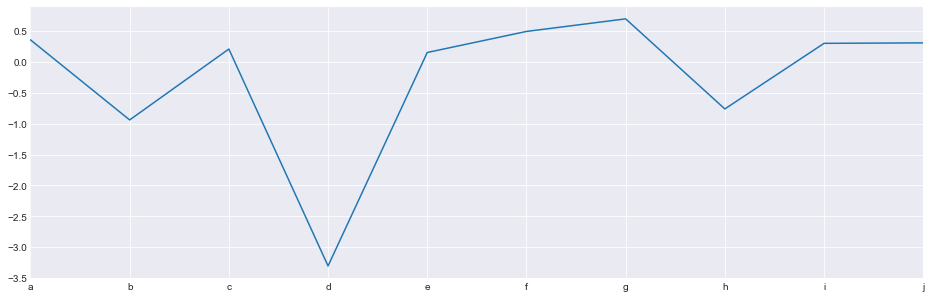

In [255]:
# We use pd.Series indexing to plot only 1 column
print(df['col1'].head())
df['col1'].plot(figsize=(16,5))

##### Plotting Multiple Columns

       col1      col2
a  0.357440  0.377538
b -0.939276 -1.143150
c  0.208520  0.212690
d -3.303072 -0.806650
e  0.152631  0.250250


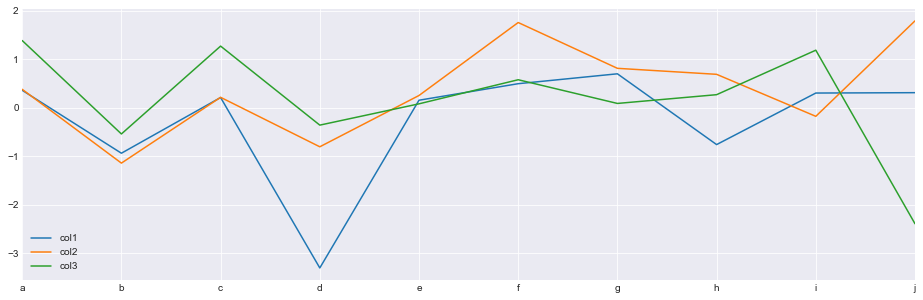

In [256]:
# We use pd.DataFrame indexing to plot multiple columns
print(df[['col1','col2']].head())
df[['col1','col2','col3']].plot(figsize=(16,5))

##### Changing Line Colour and Type

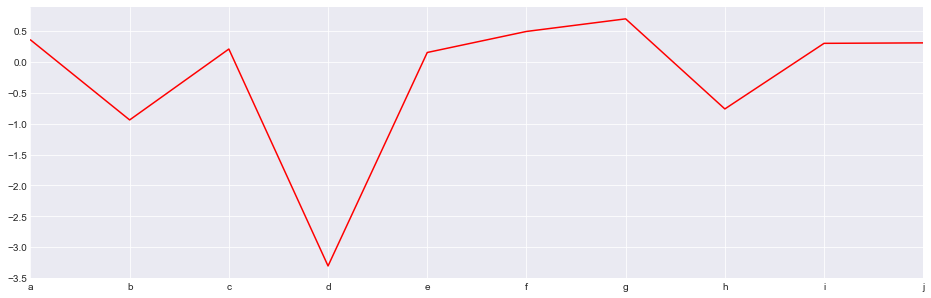

In [257]:
# For a data Series, pass the 'style' argument
df['col1'].plot(style="r",figsize=(16,5))

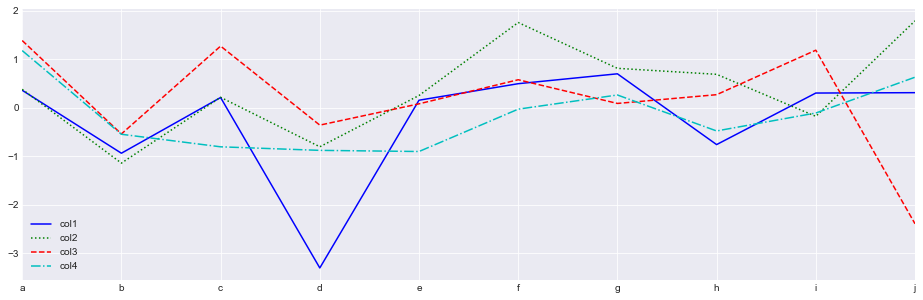

In [258]:
# For a DataFrame, pass the style argument with a dictionary
# We can denote basic colours and line types
df.plot(style={'col1':'-b','col2':':g','col3':'--r','col4':'-.c'},figsize=(16,5))

##### Styling

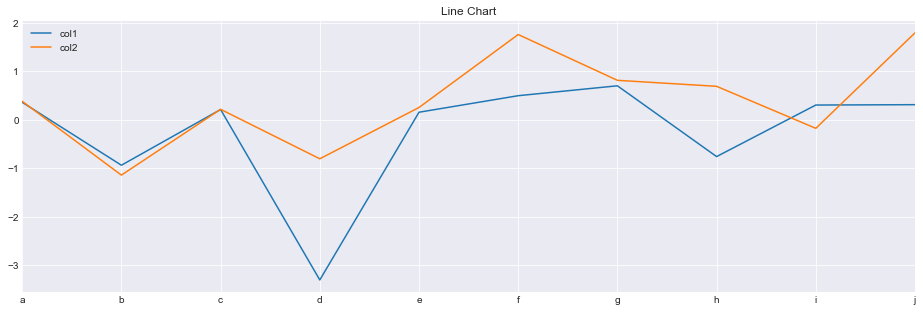

In [259]:
# We can do some basic styling, but its better to use matplotlib.pyplot to do it, we'll go through this later
df[['col1','col2']].plot(title='Line Chart',grid=True,figsize=(16,5))

##### Bar and Horizontal Bar Plots

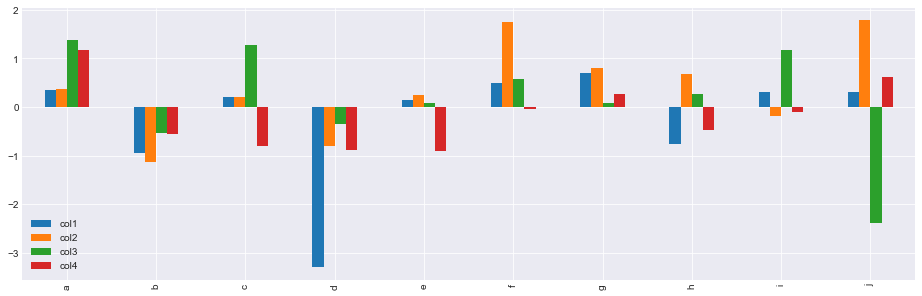

In [260]:
# We can make different plots by passing to the 'kind' argument
# These include bar plot, horizontal bar plot, histogram, boxplot and scatter plot
df.plot(kind='bar',figsize=(16,5))

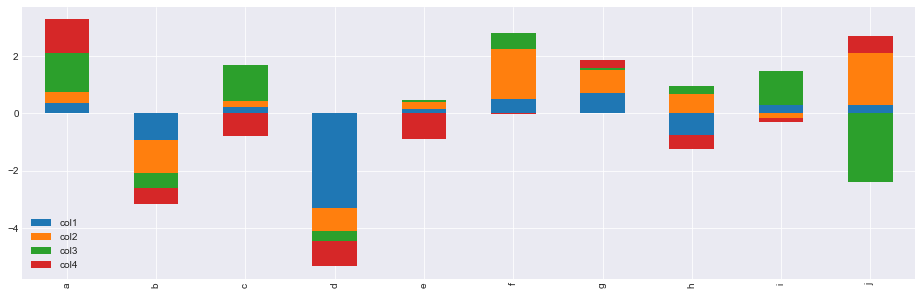

In [261]:
# Stacked barplot
df.plot(kind='bar',stacked=True, figsize=(16,5))

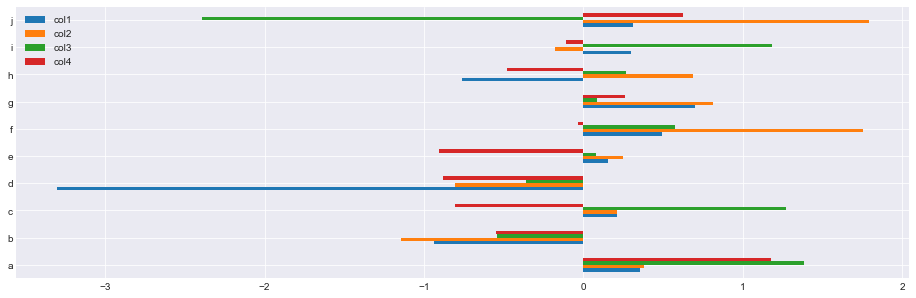

In [262]:
df.plot(kind='barh', figsize=(16,5))

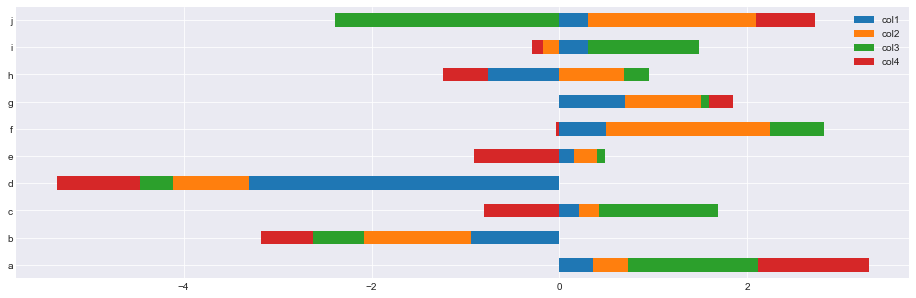

In [263]:
df.plot(kind='barh',stacked=True, figsize=(16,5))

##### Histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018A9EFCE780>,
      dtype=object)

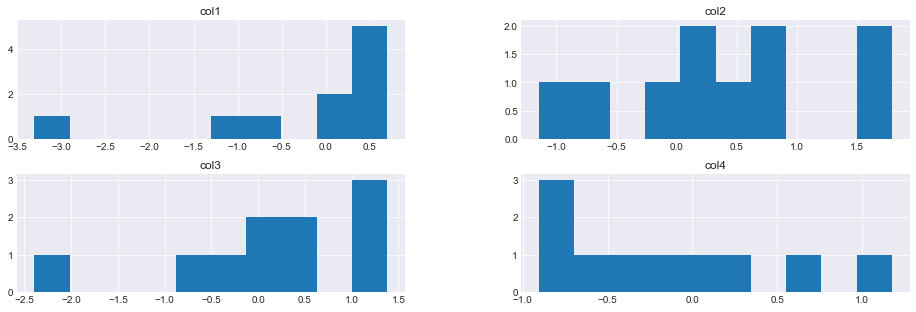

In [264]:
# Preferred method over using pd.DataFrame.plot(kind='hist')
# Styling looks better
df.hist(figsize =(16,5))

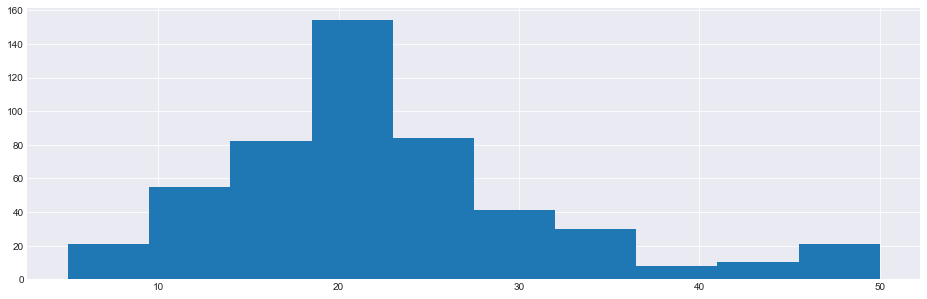

In [265]:
# The default number of bins is 5
housing['MEDV'].hist(figsize =(16,5))

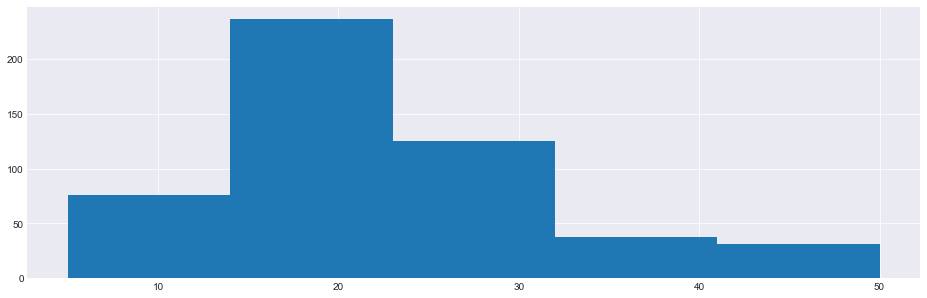

In [266]:
# We can specify the number of bins
housing['MEDV'].hist(bins=5,figsize =(16,5))

##### Boxplot

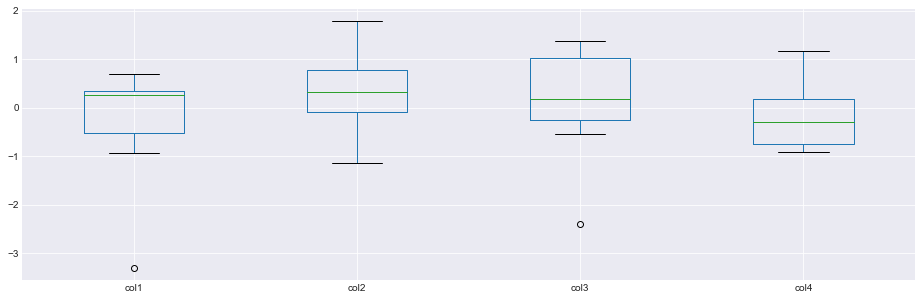

In [267]:
df.boxplot(figsize =(16,5))

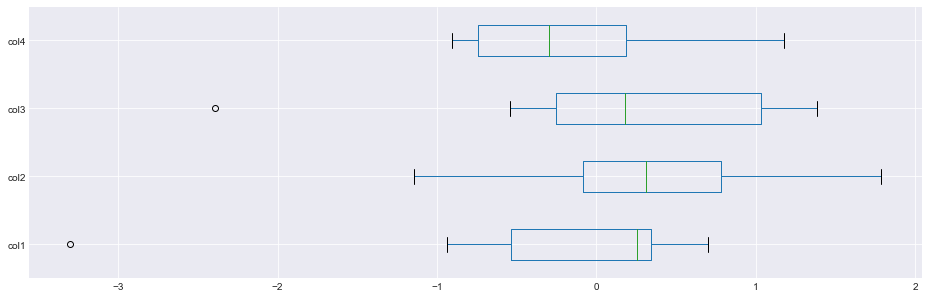

In [268]:
df.boxplot(vert=False,figsize =(16,5))

##### Scatter

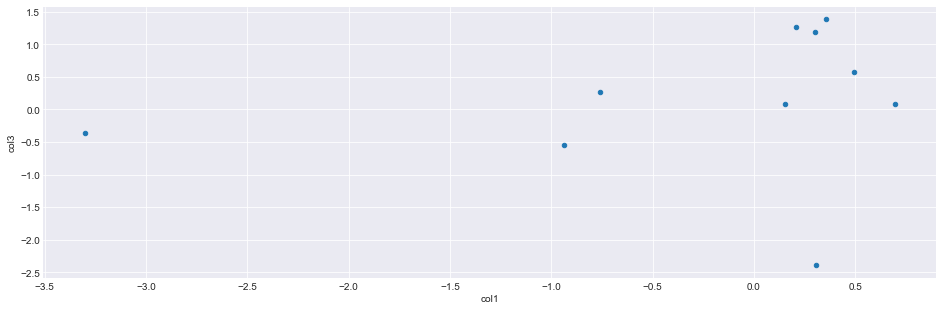

In [269]:
# To plot a scatter plot we need to pass a Series into the x and y arguments
df.plot(kind='scatter',x='col1',y='col3',figsize=(16,5))

##### Styling with Matplotlib.pyplot

In [270]:
# plt.style.use changes the style for all future pd.DataFrame.plot() and Matplotlib.pyplot
import matplotlib.pyplot as plt

plt.style.use('seaborn-darkgrid')

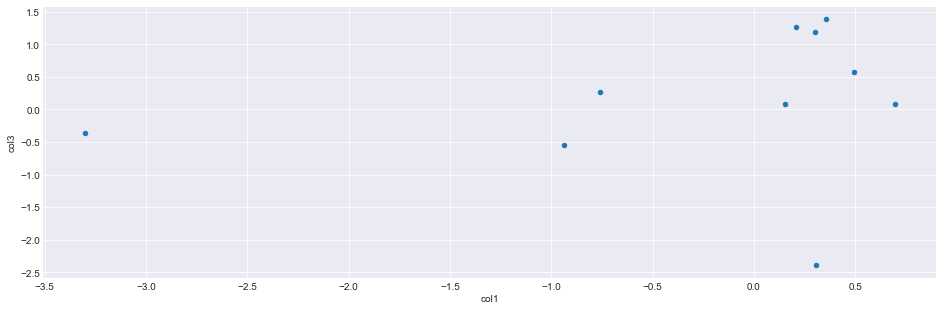

In [271]:
# Compare the difference between the two scatter charts
df.plot(kind='scatter',x='col1',y='col3',figsize =(16,5))

In [272]:
# The styles avaiable can be found here:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

##### Styling with Matplotlib.pyplot
* Matplotlib introduces three classes for plotting:
    * Figure - a figure represents a whole canvas that houses all the axes
    * Axes - axes are subplots. There can be multiple axes within a figure
    * Axis - The axis are the smaller elements within each axes
* [Axes styling reference guide](https://matplotlib.org/3.1.1/api/axes_api.html?highlight=axes#the-axes-class)

<img src="https://2.bp.blogspot.com/-F__I5bCe3uI/XRS1Y3gdP9I/AAAAAAAAHxk/plElt8VRYRMp42BuHTe9wkD29hZaPvo-ACLcBGAs/s1600/figure_axes.PNG" style='height:400px;margin-left:auto;margin-right:auto'>

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcS4lcZFFe9n8akU4kgUAbC4bh0AtLCz3AmDTMInGTQXQsrvcWDJ" style='height:500px;margin-left:auto;margin-right:auto'>

<img src="https://matplotlib.org/_images/anatomy.png" style='height:500px;margin-left:auto;margin-right:auto'>

<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.figure.Figure'>


Text(0.5, 0.98, 'Figure Title')

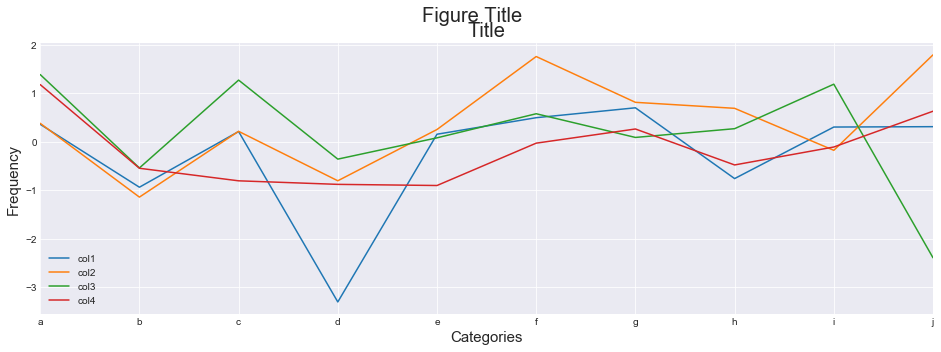

In [273]:
# When we use pd.DataFrame.plot(), Matplotlib.pyplot will create a new figure and axis objects
# df.plot() returns a axes object, which we can manipulate
ax = df.plot(figsize =(16,5))
print(type(ax))
ax.set_xlabel('Categories',size=15)
ax.set_ylabel('Frequency',size=15)
ax.set_title('Title',size=20)

# plt.gcf() returns the current figure object
# We can also manipulate this
# The figure title is reduant here but will be clearer with more subplots
fig = plt.gcf()
print(type(fig))
fig.suptitle('Figure Title',size=20)

##### Subplots with Matplotlib.pyplot
* When creating subplots, we use:

```python
fig,ax = plt.subplots(rows,cols)
```

* plt.subplots() returns a figure and axes object
* The axes object is a numpy array in the shape of rows x cols
* Using the co-ordinates of the numpy array we can tell pd.DataFrame.plot() where to plot in the subplots

<class 'matplotlib.figure.Figure'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
AxesSubplot(0.125,0.125;0.775x0.755)


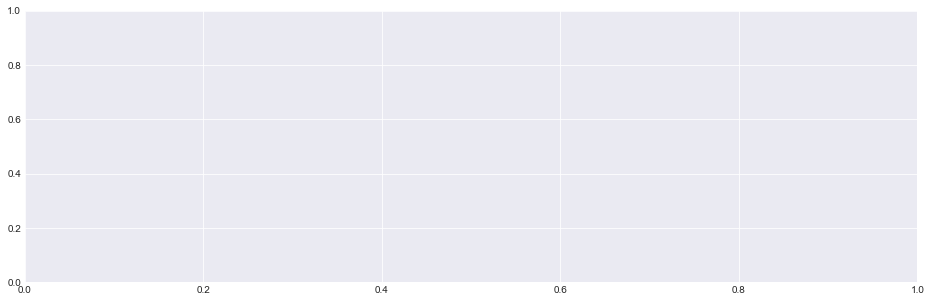

In [274]:
# We create a figure with 1 subplot, not too interesting
# For 1 subplot, the axes type is an axes object
# Note what is being printed for ax, as the number of subplots change
fig, ax = plt.subplots(1,1, figsize=(16,5))
print(type(fig))
print(type(ax))
print(ax)

<class 'matplotlib.figure.Figure'>
<class 'numpy.ndarray'>
[[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018AA147BA90>
(2, 3)


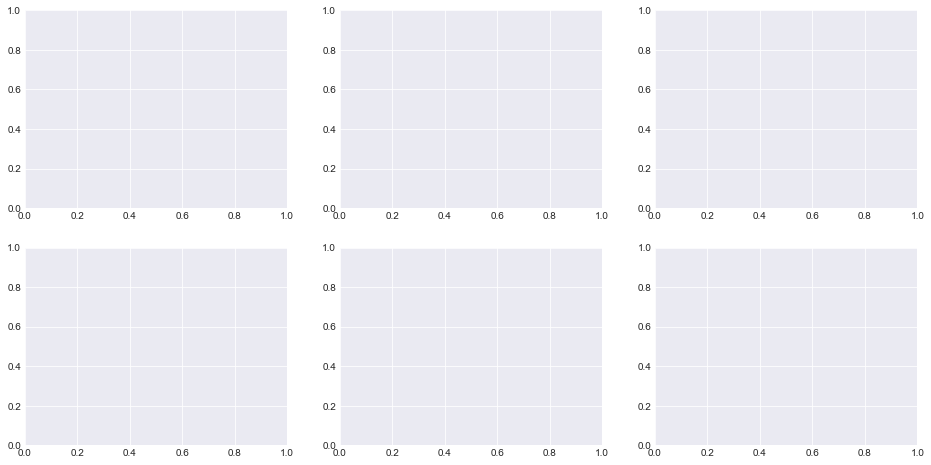

In [275]:
# For multiple subplot, the axes type is a numpy array
# Its a numpy array of multiple axes objects
# Its shape matches the arguments we've given it
fig, ax = plt.subplots(2,3, figsize=(16,8))
print(type(fig))
print(type(ax))
print(ax)
print(ax.shape)

In [276]:
# Let's try indexing the numpy array
# The first and second elements seem to be representing the x and y co-ordinates
print(ax[0,0])
print(ax[0,1])
print(ax[0,2])
print(ax[1,0])
print(ax[1,1])
print(ax[1,2])

AxesSubplot(0.125,0.536818;0.227941x0.343182)
AxesSubplot(0.398529,0.536818;0.227941x0.343182)
AxesSubplot(0.672059,0.536818;0.227941x0.343182)
AxesSubplot(0.125,0.125;0.227941x0.343182)
AxesSubplot(0.398529,0.125;0.227941x0.343182)
AxesSubplot(0.672059,0.125;0.227941x0.343182)


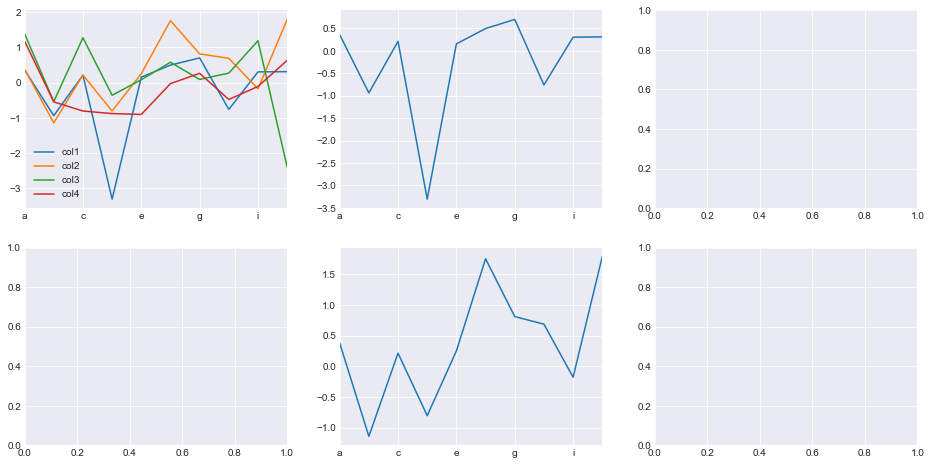

In [277]:
# Then apply same theory to plotting by passing the intended axes into the ax argument (ax is the shortform for axes)
fig, ax = plt.subplots(2,3, figsize=(16,8))
df.plot(ax=ax[0,0])
df['col1'].plot(ax=ax[0,1])
df['col2'].plot(ax=ax[1,1])

##### Plotting a Normal Curve

### Plotting with Seaborn
---
* Seaborn can do a lot of impressive plots
* [Refer to the example gallery](https://seaborn.pydata.org/examples/index.html)

In [278]:
import seaborn as sns

##### Heatmaps

In [279]:
housing.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.300774,0.590822,0.013922,0.634679,-0.190197,0.482013,-0.495148,-0.088451,0.793392,0.362615,-0.377013,0.481907,-0.362077
ZN,-0.300774,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.566660,-0.119290,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.590822,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.678498,-0.087615,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,0.013922,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.090950,0.079105,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.634679,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.748872,0.009217,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.190197,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.225052,0.088753,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.482013,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.713313,0.019658,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.495148,0.566660,-0.678498,-0.090950,-0.748872,0.225052,-0.713313,1.000000,0.003030,-0.541369,-0.269140,0.293621,-0.479158,0.264325
RAD,-0.088451,-0.119290,-0.087615,0.079105,0.009217,0.088753,0.019658,0.003030,1.000000,-0.049221,-0.116969,0.040705,-0.069828,0.113519
TAX,0.793392,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.541369,-0.049221,1.000000,0.460853,-0.441808,0.543993,-0.468536


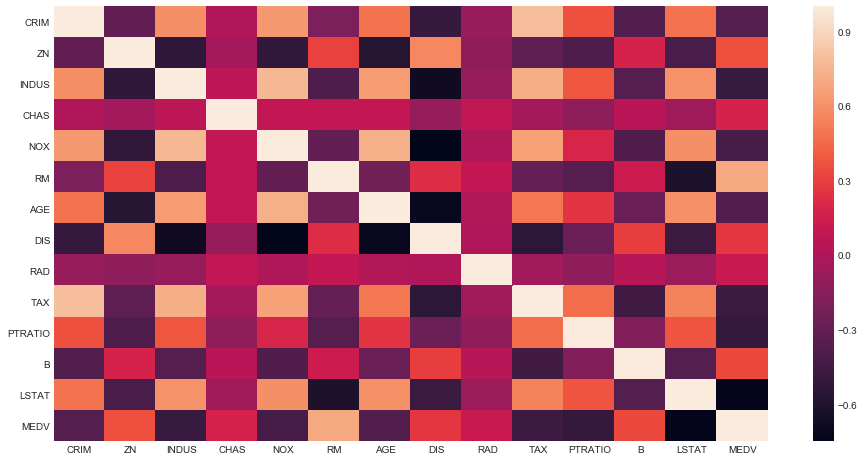

In [280]:
fig,ax = plt.subplots(1,1,figsize=(16,8))
sns.heatmap(housing.corr(),ax=ax)

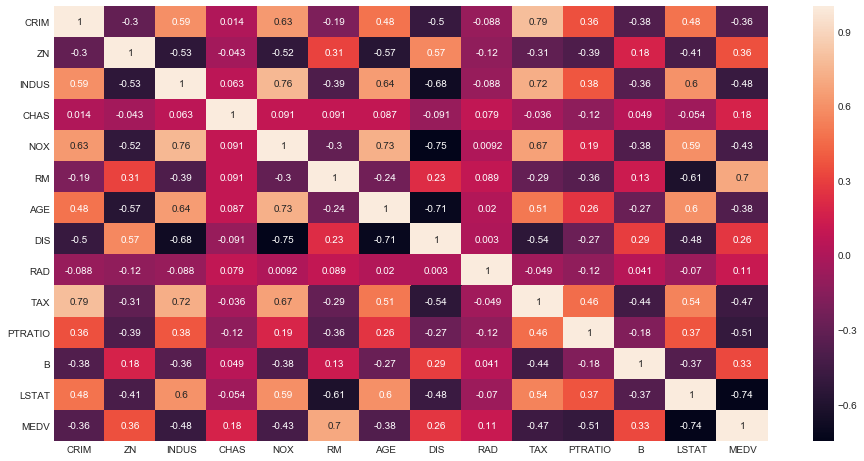

In [281]:
fig,ax = plt.subplots(1,1,figsize=(16,8))
sns.heatmap(housing.corr(),ax=ax,annot=True)

##### Seaborn Plotting Workthrough
* [Based off of](https://seaborn.pydata.org/examples/scatterplot_categorical.html)

In [282]:
# Cleaning iris data
from pprint import pprint

columns = ['sepal_length','sepal_width','petal_length','petal_width','class']
print(columns)

with open('Data/iris.data') as f:
    rows = f.readlines()

clean = [row.strip('\n').split(',') for row in rows[:-1]]

def try_float(x):
    try:
        value = float(x)
    except:
        value = x

    return value

clean = [[try_float(element) for element in row] for row in clean]
pprint(clean)

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
[[5.1, 3.5, 1.4, 0.2, 'Iris-setosa'],
 [4.9, 3.0, 1.4, 0.2, 'Iris-setosa'],
 [4.7, 3.2, 1.3, 0.2, 'Iris-setosa'],
 [4.6, 3.1, 1.5, 0.2, 'Iris-setosa'],
 [5.0, 3.6, 1.4, 0.2, 'Iris-setosa'],
 [5.4, 3.9, 1.7, 0.4, 'Iris-setosa'],
 [4.6, 3.4, 1.4, 0.3, 'Iris-setosa'],
 [5.0, 3.4, 1.5, 0.2, 'Iris-setosa'],
 [4.4, 2.9, 1.4, 0.2, 'Iris-setosa'],
 [4.9, 3.1, 1.5, 0.1, 'Iris-setosa'],
 [5.4, 3.7, 1.5, 0.2, 'Iris-setosa'],
 [4.8, 3.4, 1.6, 0.2, 'Iris-setosa'],
 [4.8, 3.0, 1.4, 0.1, 'Iris-setosa'],
 [4.3, 3.0, 1.1, 0.1, 'Iris-setosa'],
 [5.8, 4.0, 1.2, 0.2, 'Iris-setosa'],
 [5.7, 4.4, 1.5, 0.4, 'Iris-setosa'],
 [5.4, 3.9, 1.3, 0.4, 'Iris-setosa'],
 [5.1, 3.5, 1.4, 0.3, 'Iris-setosa'],
 [5.7, 3.8, 1.7, 0.3, 'Iris-setosa'],
 [5.1, 3.8, 1.5, 0.3, 'Iris-setosa'],
 [5.4, 3.4, 1.7, 0.2, 'Iris-setosa'],
 [5.1, 3.7, 1.5, 0.4, 'Iris-setosa'],
 [4.6, 3.6, 1.0, 0.2, 'Iris-setosa'],
 [5.1, 3.3, 1.7, 0.5, 'Iris-setosa'],
 [4.8, 3.4, 1.9,

In [287]:
# An example of the pd.melt() method to convert a dataframe from wideform to longform
# First creating an example df
test = pd.DataFrame({'A': {0: 'a', 1: 'b', 2: 'c'},
                     'B': {0: 1, 1: 3, 2: 5},
                     'C': {0: 2, 1: 4, 2: 6}})
test

,A,B,C
0,a,1,2
1,b,3,4
2,c,5,6


In [290]:
# Unpacks the dataframe per column A
# variable will contain the column name of the other columns, in this case 'B' & 'C'
# value will contain the associated value
test2 = pd.melt(test,'A')
test2

,A,variable,value
0,a,B,1
1,b,B,3
2,c,B,5
3,a,C,2
4,b,C,4
5,c,C,6


In [291]:
# Checking dataframe length
df = pd.DataFrame(clean,columns=(columns))
print(len(df))
df.head()

150


,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [292]:
# Unpacking df per 'class' column
long = pd.melt(df,'class')
print(len(long))
long

600


,class,variable,value
0,Iris-setosa,sepal_length,5.1
1,Iris-setosa,sepal_length,4.9
2,Iris-setosa,sepal_length,4.7
3,Iris-setosa,sepal_length,4.6
4,Iris-setosa,sepal_length,5.0
5,Iris-setosa,sepal_length,5.4
6,Iris-setosa,sepal_length,4.6
7,Iris-setosa,sepal_length,5.0
8,Iris-setosa,sepal_length,4.4
9,Iris-setosa,sepal_length,4.9


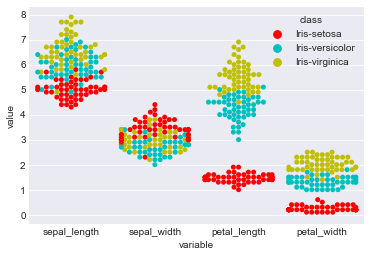

In [293]:
# The swarmplot is a scatter plot without overlapping points
sns.swarmplot(data=long,x="variable",y="value",hue='class', palette=["r", "c", "y"])